Step 1 : Load dataset

In [7]:
# load the dataset 

import pandas as pd

# Load the dataset
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

# Check the first few rows and data types
print(df.head())
print(df.dtypes)


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [8]:
# Check for missing values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Step 2 : Preprocessing data

In [23]:
# One-Hot Encoding of categorical variables or ( label encoding look for it )
# look for the class balancy
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the new column names
print(df_encoded.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [24]:
df_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False


In [10]:
# Fill missing values (if any) using the mean of numeric columns
df_encoded.fillna(df_encoded.mean(), inplace=True)

In [11]:
# Separate features and target
X = df_encoded.drop('y_yes', axis=1)  # Assuming 'y' is the target column
y = df_encoded['y_yes']

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Feature Distribution

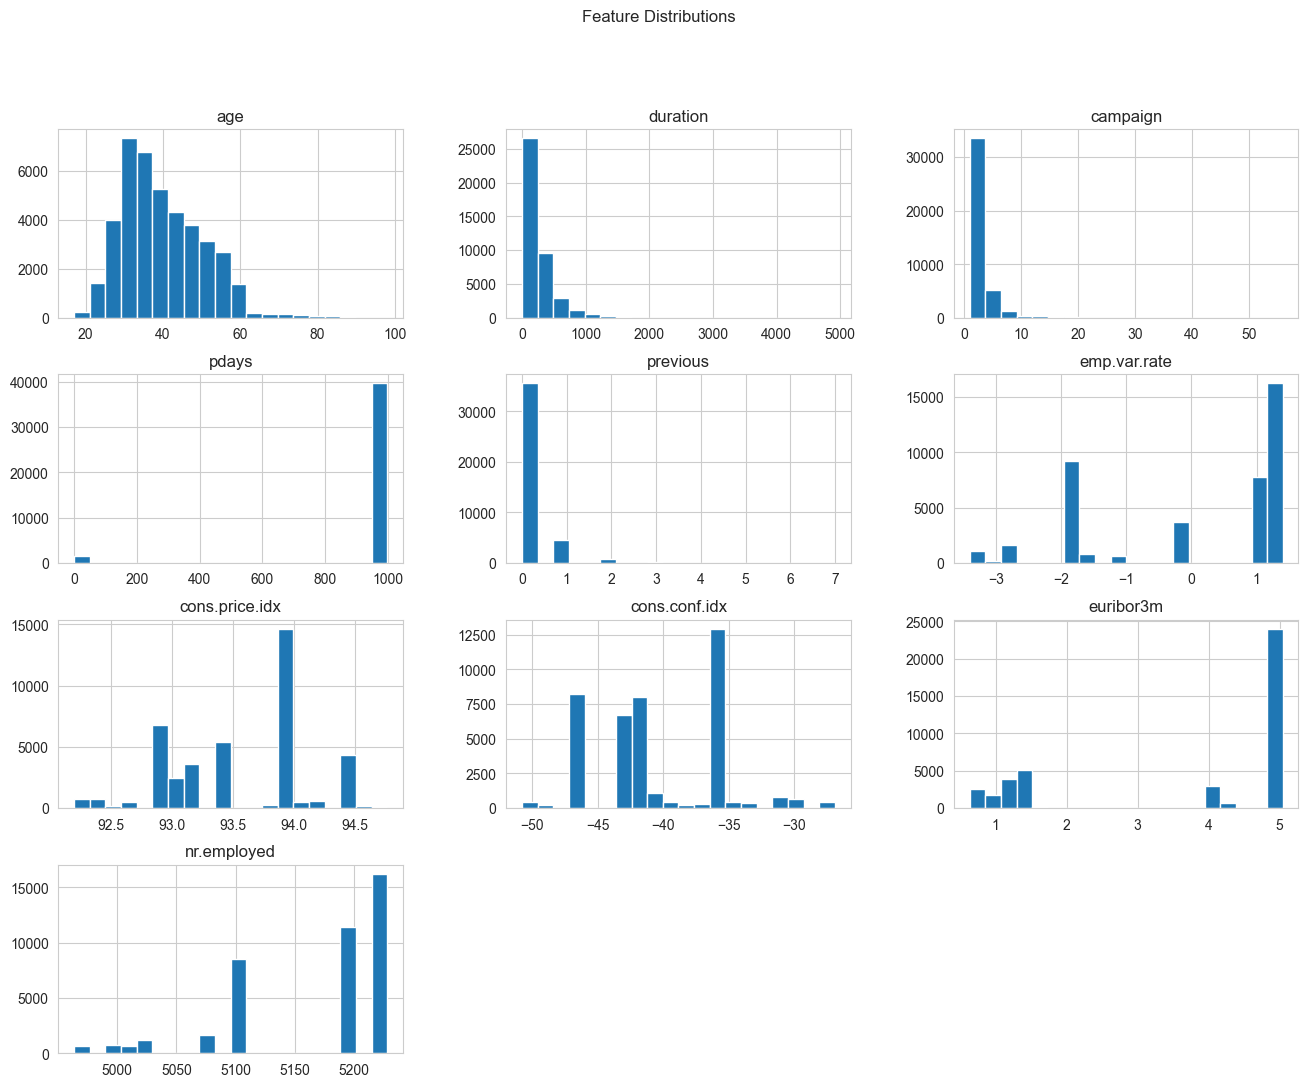

In [17]:
### 2. Feature Distribution
import matplotlib.pyplot as plt
# Histogram for numeric features
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(16, 12), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

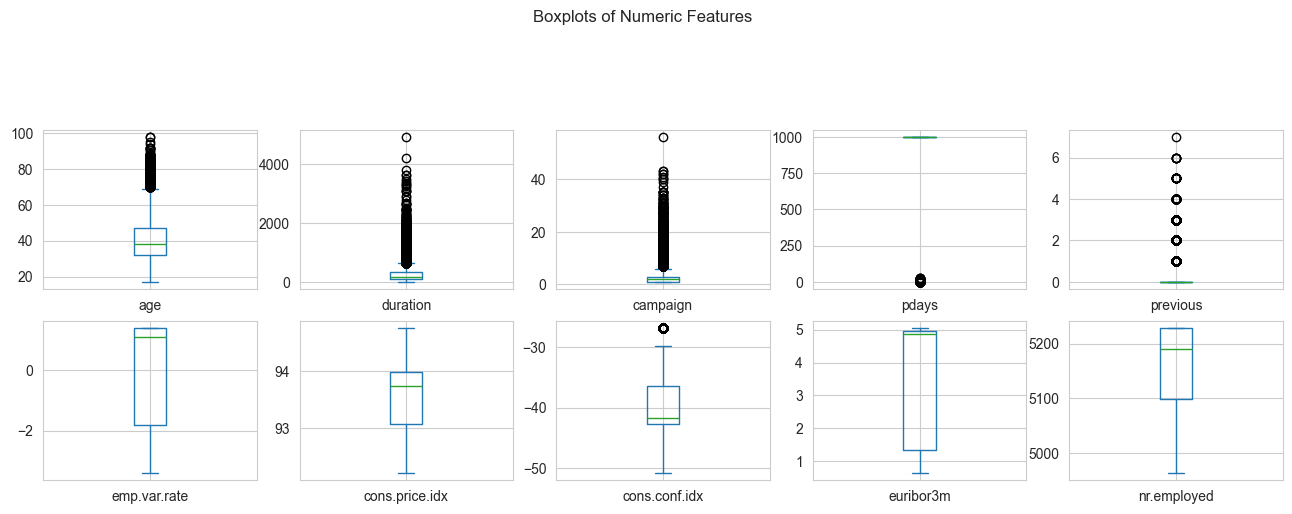

In [18]:
# Boxplots for numeric features (to detect outliers)
df.select_dtypes(include=['float64', 'int64']).plot(kind='box', subplots=True, layout=(5,5), figsize=(16,12), sharex=False, sharey=False)
plt.suptitle('Boxplots of Numeric Features')
plt.show()

Correlation Matrix

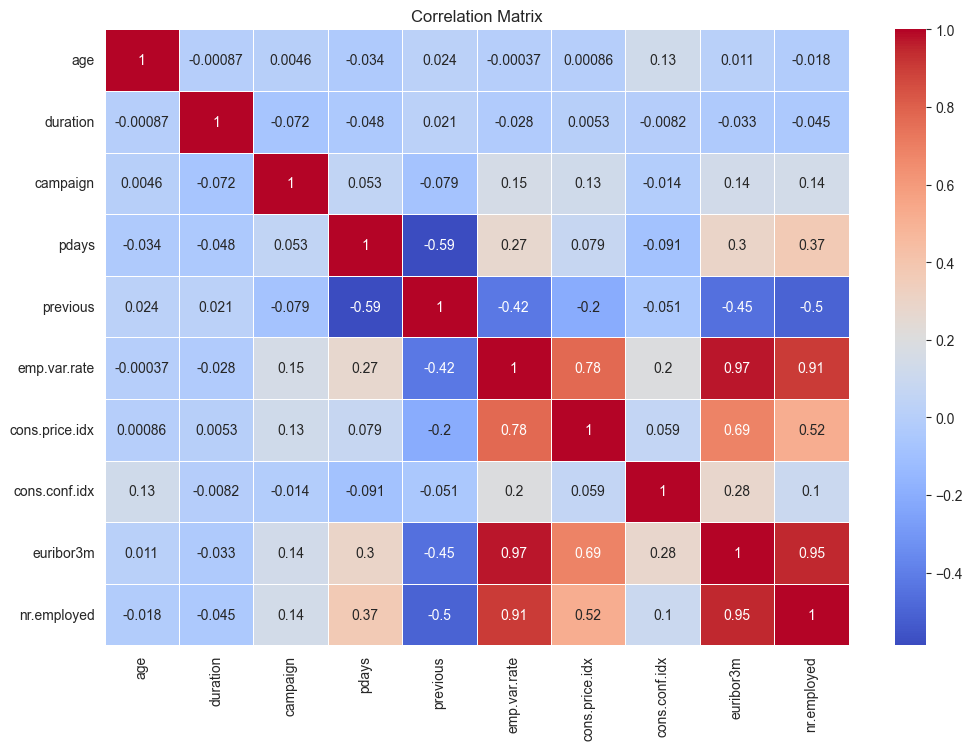

In [19]:
# Correlation matrix for numeric features
import seaborn as sns
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Step 3 : Model Implementation

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Train the SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate SVM performance
print('SVM Classification Report:\n', classification_report(y_test, y_pred_svm))
print('SVM AUC-ROC:', roc_auc_score(y_test, y_pred_proba_svm))


SVM Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.98      0.95     10968
        True       0.67      0.37      0.48      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.67      0.71     12357
weighted avg       0.90      0.91      0.90     12357

SVM AUC-ROC: 0.930917528785881


Step 4 : Model Evaluation

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation of SVM
print("SVM Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm)}")
print(f"Recall: {recall_score(y_test, y_pred_svm)}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_svm)}")

SVM Model:
Accuracy: 0.9092012624423403
Precision: 0.6740547588005215
Recall: 0.3722102231821454
F1-Score: 0.47959183673469385
AUC-ROC: 0.930917528785881


Confusion Matrix

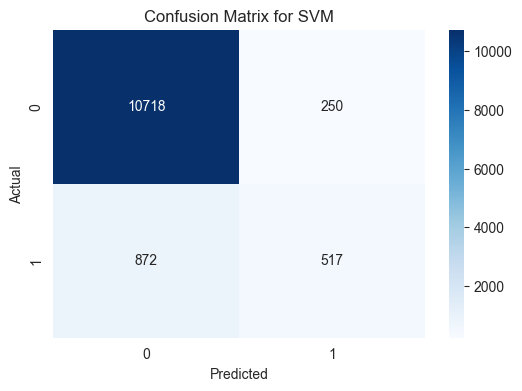

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC Curve

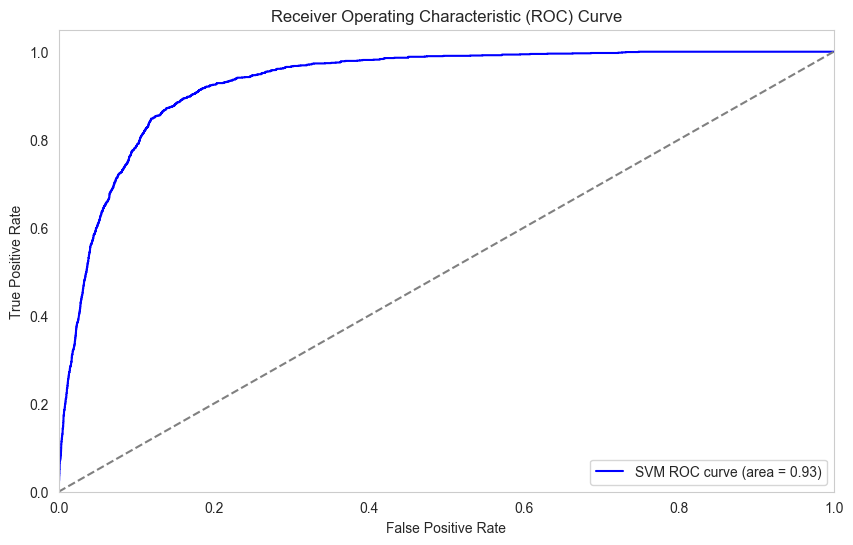

In [25]:
from sklearn.metrics import roc_curve, auc

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


The ROC value is close to 1 that indicates better performance.

How to test class balancy


In [ ]:
# import matplotlib.pyplot as plt
#import seaborn as sns

# Create a bar plot
#sns.countplot(x='target', data=df)
#plt.title('Class Distribution')
#plt.show()
